In [1]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from datasets import Dataset
import json
import pandas as pd

Mounted at /content/drive


In [ ]:
# ls drive/MyDrive/'Colab Notebooks'/Cathys_test_IZ/

In [2]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Cathys_test_IZ/dataset.csv')

In [ ]:
# replacing NaN with empty strings
df['Customer Remarks'] = df['Customer Remarks'].fillna('')
#display(df[['Customer Remarks']].head(50))

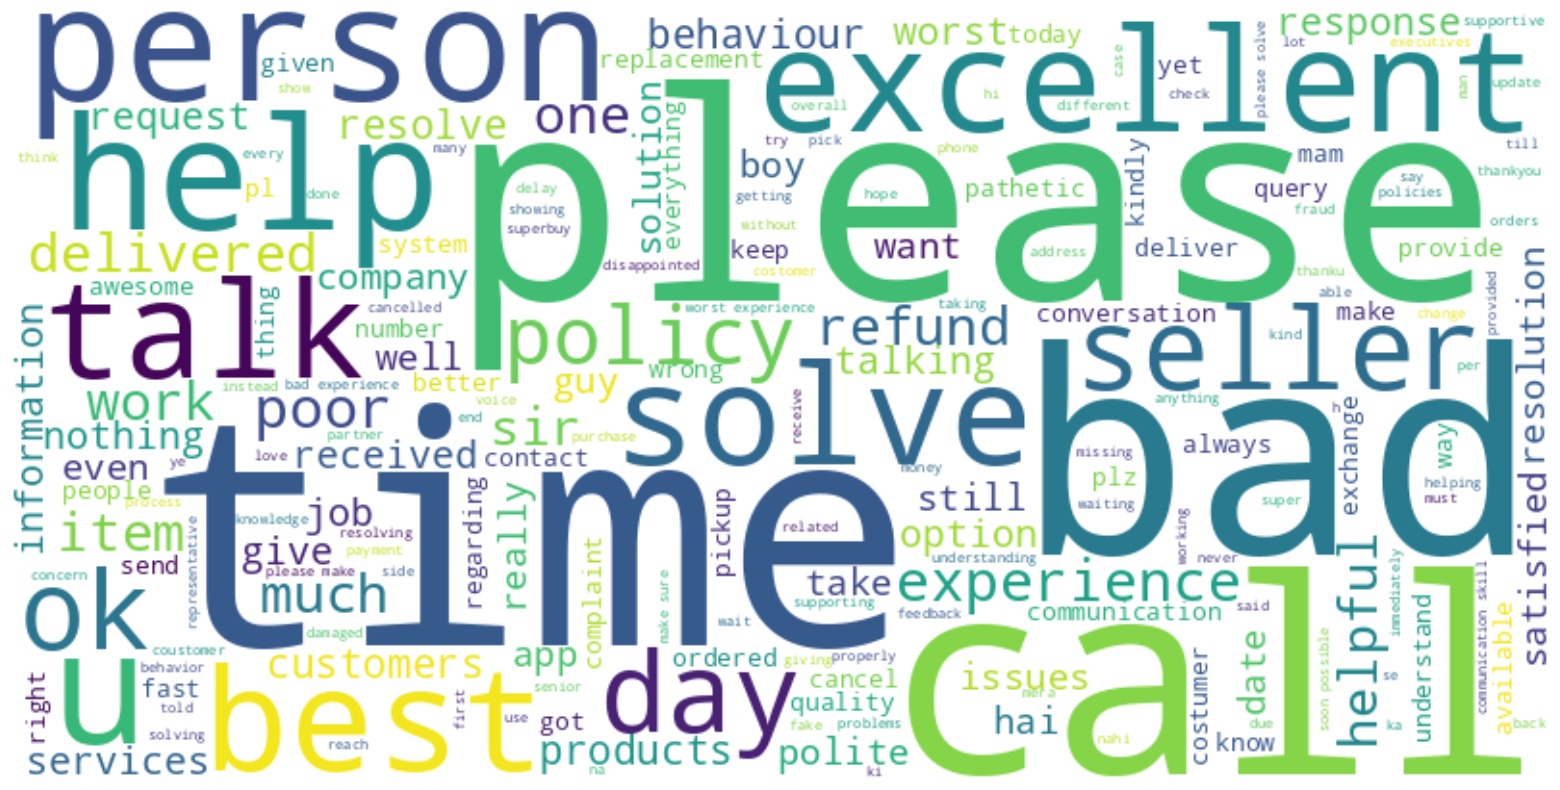

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re


nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)


stop_words = list(stopwords.words('english'))  # Default from nltk
newStopWords = [#'hotel','mgm','macau','macau','room','staff','hotels','friend','free','us','check'
                #                     ,'much','visit' , 'many' , 'check','even','way','bit','arrived'
                #                     ,'night','casino','service','stayed','got','around','provide','really'
                                    #  ,'every','even','make','check','took','provided','wynn','staying','booked'
                                    #  ,'Venetian','trip','made','will', 'went','always','say','came','need'
                                    #  ,'day','time','u','one','first', 'product', 'service', 'customer', 'issue', 'problem', 'return', 'order'
                                    #  ,"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"
                              'product', 'service', 'customer', 'good', 'great', 'nice', 'thank', 'thanks', 'issue', 'problem', 'return', 'order',
                'supported', 'team', 'executive', 'need', 'improve', 'proper', 'details', 'care', 'delivery',
                'support', 'agent', 'happy',
                'shopzilla',  'resolved', 'solved']
stop_words.extend(newStopWords)
stop_words = set(stop_words)


def review_to_words(review):
    """Convert a raw review string into a sequence of words."""

    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    # log('Raw input :')
    # log(review)

    # remove HTML tags
    review=BeautifulSoup(review, "html5lib").get_text()
    #log('\nHTML tags removed')
    #log(review)

    # remove punctuation and numeric
    #review = re.sub(r"[^a-zA-Z0-9]", " ", review)
    review = re.sub(r"[^a-zA-Z]", " ", review)
    # log('\n Punctuation removed')
    # log(review)

    # lowercase
    review = review.lower()

    # tokenize
    review = nltk.word_tokenize(review)
    # log('\n Tokenized')
    # log(review)

    # remove stop words
    #review = [w for w in review if w not in stopwords.words("english")]
    #review = [w for w in review if w not in STOPWORDS_sentiment and w not in ([n.lower() for n in namelist])]
    review = [w for w in review if w not in stop_words]

    # log('\n Stop words removed')
    # log(review)

    # stemming
    #review = [PorterStemmer().stem(w) for w in review if w not in STOPWORDS_sentiment and w not in ([n.lower() for n in namelist])]
    #log('\n Stemmed')
    #log(review)

    # log('\n\n')
    #words=[]

    # Return final list of words
    return ' '.join(review)


df['cleaned_remarks'] = df['Customer Remarks'].apply(review_to_words)
#display(df[['Customer Remarks', 'cleaned_remarks']].head(10))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# cleaned remarks into a single string
all_remarks = " ".join(df['cleaned_remarks'].astype(str))

# plo t the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_remarks)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#iterative process to remove prominent words if they are not helping to differentiate between intents



In [ ]:
# Find pre-defined intents labels
print("Unique values in 'category' column:\n")
display(df['category'].unique())

print("\n")
display(df['Sub-category'].unique())
# print("\n")
# display(df['category'].value_counts())

# display(df['Sub-category'].value_counts())

Unique values in 'category' column:



array(['Product Queries', 'Order Related', 'Returns', 'Cancellation',
       'Shopzilla Related', 'Payments related', 'Refund Related',
       'Feedback', 'Offers & Cashback', 'Onboarding related', 'Others',
       'App/website'], dtype=object)

array(['Life Insurance', 'Product Specific Information',
       'Installation/demo', 'Reverse Pickup Enquiry', 'Not Needed',
       'Fraudulent User', 'Exchange / Replacement', 'Missing',
       'General Enquiry', 'Return request', 'Delayed',
       'Service Centres Related', 'Payment related Queries',
       'Order status enquiry', 'Return cancellation', 'Unable to track',
       'Seller Cancelled Order', 'Wrong', 'Invoice request',
       'Priority delivery', 'Refund Related Issues', 'Signup Issues',
       'Online Payment Issues', 'Technician Visit',
       'UnProfessional Behaviour', 'Damaged', 'Product related Issues',
       'Refund Enquiry', 'Customer Requested Modifications',
       'Instant discount', 'Card/EMI', 'Shopzila Premium Related',
       'Account updation', 'COD Refund Details', 'Seller onboarding',
       'Order Verification', 'Other Cashback', 'Call disconnected',
       'Wallet related', 'PayLater related', 'Call back request',
       'Other Account Related Issues

In [ ]:
display(df['cleaned_remarks'].sample(20).tolist())
display(df[['category', 'Sub-category']].head())

['',
 '',
 'system poor like tortoise andi satisfied',
 '',
 '',
 '',
 '',
 'resloved till yesterday also raised got email saying resloved resolution bad',
 'worst experience',
 'pls display correct toll free number google easy connect',
 '',
 '',
 'ddh',
 '',
 '',
 '',
 '',
 'worst experience damaged items received refund supplier cheating thro',
 '',
 'much conversation']

,category,Sub-category
0,Product Queries,Life Insurance
1,Product Queries,Product Specific Information
2,Order Related,Installation/demo
3,Returns,Reverse Pickup Enquiry
4,Cancellation,Not Needed




---



---



---



In [ ]:
# Feature enginerring:
# Convert the remark text data into numerical features.
# Import the TfidfVectorizer and transform the cleaned remarks into a TF-IDF matrix.
# try word embeddings later if have enough time (e.g., Word2Vec, GloVe)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_remarks'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (85907, 9414)


In [ ]:
#Train the selected machine learning models (Naive Bayes, SVM, Logistic Regression) on the prepared TF-IDF features and the chosen target variable ('category' or 'Sub-category').

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# use 'category' as the target variable.
#'Sub-category' can also be used
target_variable = 'category'
y = df[target_variable]

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Instantiate models
nb_model = MultinomialNB()
svm_model = LinearSVC()
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

print("-----Training done-----")

-----Training done-----




---



---



---



## Model evaluation


In [ ]:
# Calculate and evaluate the performance of the trained models using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
nb_predictions = nb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted', zero_division=0)
nb_recall = recall_score(y_test, nb_predictions, average='weighted', zero_division=0)
nb_f1 = f1_score(y_test, nb_predictions, average='weighted', zero_division=0)

print("--- Naive Bayes Model Evaluation ---")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-score: {nb_f1:.4f}")

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0) # suppress the UndefinedMetricWarning
svm_recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted', zero_division=0)

print("\n--- SVM Model Evaluation ---")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, lr_predictions, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, lr_predictions, average='weighted', zero_division=0)

print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")

--- Naive Bayes Model Evaluation ---
Accuracy: 0.5175
Precision: 0.4432
Recall: 0.5175
F1-score: 0.3622

--- SVM Model Evaluation ---
Accuracy: 0.5155
Precision: 0.4184
Recall: 0.5155
F1-score: 0.3823

--- Logistic Regression Model Evaluation ---
Accuracy: 0.5188
Precision: 0.4811
Recall: 0.5188
F1-score: 0.3775


## Intent prediction



In [ ]:
#Use the trained models to predict the intent of new customer remarks.

# Pick a the better performed trained models (e.g., lr_model)
selected_model = lr_model

# Create an unseen customer remarks as strings.
new_remarks = [
    "My order hasn't arrived yet, can you check the status?",
    "I want to return a damaged item I received.",
    "How can I reset my password on the app?",
    "I have a question about the warranty for my recent purchase.",
    "There's an issue with the payment for my subscription."
]

# Smee preprocess and vectorization steps as done during training to produce the same shape of data
cleaned_new_remarks = [review_to_words(remark) for remark in new_remarks]

# Transform using the fitted tfidf_vectorizer
new_remarks_tfidf = tfidf_vectorizer.transform(cleaned_new_remarks)

# predict the intent
predicted_intents = selected_model.predict(new_remarks_tfidf)

print("--- Predicted Intents for New Customer Remarks ---")
for remark, intent in zip(new_remarks, predicted_intents):
    print(f"Remark: {remark}")
    print(f"Predicted Intent: {intent}")
    print("-" * 30)

--- Predicted Intents for New Customer Remarks ---
Remark: My order hasn't arrived yet, can you check the status?
Predicted Intent: Returns
------------------------------
Remark: I want to return a damaged item I received.
Predicted Intent: Returns
------------------------------
Remark: How can I reset my password on the app?
Predicted Intent: Returns
------------------------------
Remark: I have a question about the warranty for my recent purchase.
Predicted Intent: Order Related
------------------------------
Remark: There's an issue with the payment for my subscription.
Predicted Intent: Order Related
------------------------------


## Misclassifications

### confusion matrix:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


target_variable = 'category'
y = df[target_variable]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_remarks'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)


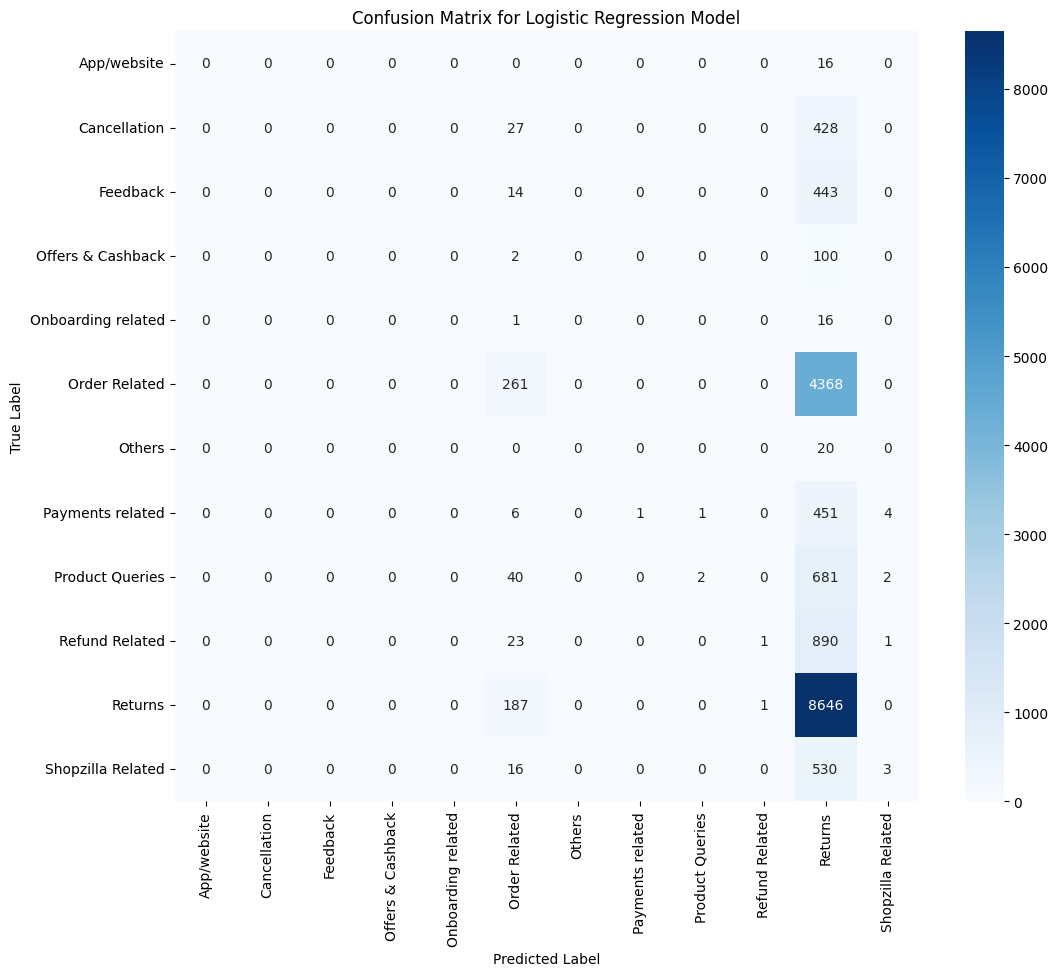

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true and predicted labels for the test set
y_true = y_test
y_pred = lr_predictions

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the unique class labels
class_labels = sorted(y_test.unique())

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Error Analysis
 misclassified customer remarks from the test set.

In [ ]:
# indices where the true and predicted labels do not match
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, lr_predictions)) if true != pred]

print(f"Number of misclassified samples: {len(misclassified_indices)}")
print("\n--- Examples of Misclassified Remarks ---")

# Display a few examples of misclassified remarks
num_examples_to_show = 10
for i in misclassified_indices[:num_examples_to_show]:
    original_remark = df.iloc[y_test.index[i]]['Customer Remarks']
    true_label = y_test.iloc[i]
    predicted_label = lr_predictions[i]

    print(f"Original Remark: {original_remark}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print("-" * 30)

Number of misclassified samples: 8268

--- Examples of Misclassified Remarks ---
Original Remark: Trusted 100/
True Label: Payments related
Predicted Label: Returns
------------------------------
Original Remark: 
True Label: Shopzilla Related
Predicted Label: Returns
------------------------------
Original Remark: Thank you Shopzilla 
True Label: Cancellation
Predicted Label: Returns
------------------------------
Original Remark: 
True Label: Order Related
Predicted Label: Returns
------------------------------
Original Remark: 
True Label: Order Related
Predicted Label: Returns
------------------------------
Original Remark: 
True Label: Order Related
Predicted Label: Returns
------------------------------
Original Remark: Nice Shopzilla talking to me 
True Label: Refund Related
Predicted Label: Returns
------------------------------
Original Remark: 
True Label: Order Related
Predicted Label: Returns
------------------------------
Original Remark: Thanks 
True Label: Shopzilla Rela



---



---



---



---



---



#Improvement items
*   Enhanced Text Preprocessing Pipeline
*   More balanced preprocessing (1st attempts aggressive text cleaning led to many remarks becoming empty)
*   Try cater class imbalance with SMOTE
*   Three versions of cleaned text (basic cleaning, lemmatized, and stemmed) for comparison






In [3]:
df['Customer Remarks'] = df['Customer Remarks'].fillna('')
display(df[['Customer Remarks']].head())

# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True) # Added this line

nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

,Customer Remarks
0,
1,
2,
3,
4,


True

In [6]:
## Advanced Text Preprocessing

# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
#stop_words = set(stopwords.words('english'))

stop_words = list(stopwords.words('english'))  # Default from nltk

custom_stop_words = {
    # 'service', 'customer', 'call', 'phone', 'time', 'day', 'today',
    # 'yesterday', 'week', 'month', 'year', 'please', 'thank', 'thanks',
    # 'hi', 'hello', 'dear', 'sir', 'madam', 'team', 'support'
    'product', 'service', 'customer', 'good', 'great', 'nice', 'thank', 'thanks'
    , 'issue', 'problem', 'return', 'order',  #11Sep2025 IZ these seems intention related words,double check if have time.
                'supported', 'team', 'executive', 'need', 'improve', 'proper'
                , 'details', 'care', 'delivery', #11Sep2025 IZ these seems intention related words ,double check if have time
                'support', 'agent', 'happy',
                'shopzilla',  'resolved', 'solved'
}
#stop_words.update(custom_stop_words)
stop_words.extend(custom_stop_words)  # disabled to preserve intent-bearing tokens
# # Contraction mapping
# contractions = {
#     'wont': 'will not', 'cant': 'cannot', 'nt': ' not',
#     're': ' are', 've': ' have', 'll': ' will',
#     'd': ' would', 'm': ' am'
# }

print("Analyzing frequency of custom stop words in Customer Remarks")

# Create a single string of all remarks
all_remarks = ' '.join(df['Customer Remarks'].dropna().tolist()).lower()

# Count and sort occurrences of each custom stop word
custom_stop_word_counts = {word: all_remarks.count(word) for word in custom_stop_words}
sorted_custom_stop_words = sorted(custom_stop_word_counts.items(), key=lambda item: item[1], reverse=True)

print("\nFrequency of custom stop words:")
for word, count in sorted_custom_stop_words:
    print(f"- '{word}': {count}")

print("\nConsider removing words that appear very frequently across different intents if they don't help differentiate between them.")

Analyzing frequency of custom stop words in 'Customer Remarks'...

Frequency of custom stop words:
- 'good': 8324
- 'customer': 4182
- 'thank': 3324
- 'shopzilla': 2935
- 'service': 2772
- 'product': 2398
- 'nice': 1957
- 'support': 1880
- 'issue': 1790
- 'problem': 1555
- 'delivery': 1498
- 'executive': 1460
- 'thanks': 1459
- 'order': 1366
- 'care': 1289
- 'return': 1064
- 'solved': 1037
- 'happy': 931
- 'resolved': 625
- 'team': 450
- 'agent': 435
- 'need': 431
- 'improve': 353
- 'proper': 284
- 'great': 275
- 'details': 101
- 'supported': 24

Consider removing words that appear very frequently across different intents if they don't help differentiate between them.


In [10]:
# def advanced_text_cleaning(text):
#     if pd.isna(text):
#         return ''

#     text = str(text).lower()
#     # Removed contraction expansion
#     # text = expand_contractions(text)

#     # Remove URLs, emails, phone numbers
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     text = re.sub(r'\S+@\S+', '', text)
#     text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', '', text)

#     # Allow letters, numbers, and some common punctuation (periods, commas, question marks, exclamation marks, hyphens, apostrophes)
#     text = re.sub(r'[^a-zA-Z0-9\s.,?!-\']', '', text)


#     # Removed negation handling
#     # text = handle_negations(text)
#     text = re.sub(r'\s+', ' ', text).strip()

#     return text`


def advanced_text_cleaning(review):
    """Convert a raw review string into a sequence of words."""

    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    # log('Raw input :')
    # log(review)

    # remove HTML tags
    review=BeautifulSoup(review, "html5lib").get_text()
    #log('\nHTML tags removed')
    #log(review)

    # remove punctuation and numeric
    #review = re.sub(r"[^a-zA-Z0-9]", " ", review)
    review = re.sub(r"[^a-zA-Z]", " ", review)
    # log('\n Punctuation removed')
    # log(review)

    # lowercase
    review = review.lower()

    # tokenize
    review = nltk.word_tokenize(review)
    # log('\n Tokenized')
    # log(review)

    # remove stop words
    #review = [w for w in review if w not in stopwords.words("english")]
    #review = [w for w in review if w not in STOPWORDS_sentiment and w not in ([n.lower() for n in namelist])]
    review = [w for w in review if w not in stop_words]

    # log('\n Stop words removed')
    # log(review)

    # stemming
    #review = [PorterStemmer().stem(w) for w in review if w not in STOPWORDS_sentiment and w not in ([n.lower() for n in namelist])]
    #log('\n Stemmed')
    #log(review)

    # log('\n\n')
    #words=[]

    # Return final list of words
    return ' '.join(review)

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    if not text:
        return ''

    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(token))
                  for token in tokens if token.lower() not in stop_words]
    return ' '.join(lemmatized)

def stem_text(text):
    if not text:
        return ''

    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(token)
               for token in tokens if token.lower() not in stop_words]
    return ' '.join(stemmed)

In [11]:
# Apply advanced preprocessing
print('Applying advanced text preprocessing...')

df['cleaned_remarks'] = df['Customer Remarks'].apply(advanced_text_cleaning)

df['cleaned_remarks_lemma'] = df['cleaned_remarks'].apply(lemmatize_text)
df['cleaned_remarks_stem'] = df['cleaned_remarks'].apply(stem_text)

print('Preprocessing completed!')


# print('Example preprocessing results:')
# for i in range(3):
#     if pd.notna(df.iloc[i]['Customer Remarks']):
#         print(f'Original: {df.iloc[i]["Customer Remarks"]}')
#         print(f'Cleaned: {df.iloc[i]["cleaned_remarks"]}')
#         print(f'Lemmatized: {df.iloc[i]["cleaned_remarks_lemma"]}')
#         print(f'Stemmed: {df.iloc[i]["cleaned_remarks_stem"]}')
#         break

display(df[['Customer Remarks', 'cleaned_remarks', 'cleaned_remarks_lemma', 'cleaned_remarks_stem']].head(25))

# Add analysis of cleaning effectiveness
# Calculate the percentage of remarks that became empty after cleaning
empty_after_cleaning = df[df['cleaned_remarks'] == ''].shape[0]
total_remarks = df.shape[0]
percentage_empty = (empty_after_cleaning / total_remarks) * 100

print(f"\nPercentage of remarks that became empty after cleaning: {percentage_empty:.2f}%")

# Display examples of remarks that changed significantly (e.g., length reduced by more than 50%)
df['original_length'] = df['Customer Remarks'].str.len()
df['cleaned_length'] = df['cleaned_remarks'].str.len()
df['length_reduction'] = (df['original_length'] - df['cleaned_length']) / df['original_length']

print("\nExamples of remarks with significant length reduction after cleaning:")
display(df[df['length_reduction'] > 0.5][['Customer Remarks', 'cleaned_remarks']].head(10))

Applying advanced text preprocessing...
Preprocessing completed!


,Customer Remarks,cleaned_remarks,cleaned_remarks_lemma,cleaned_remarks_stem
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,Very good,,,
8,Shopzilla app and it's all coustomer care serv...,app coustomer services provided time,app coustomer service provide time,app coustom servic provid time
9,,,,



Percentage of remarks that became empty after cleaning: 77.00%

Examples of remarks with significant length reduction after cleaning:


,Customer Remarks,cleaned_remarks
7,Very good,
8,Shopzilla app and it's all coustomer care serv...,app coustomer services provided time
11,Very bad,bad
19,All good,
21,Good,
25,Issue not resolved pathetic service,pathetic
29,Very good,
30,Give proper guidance to the customer,give guidance
33,Please don't sale any destroy product or cheep...,please sale destroy cheep price
37,I am very disappointed with Shopzilla.The issu...,disappointed polite enough though able resolve...


In [14]:
df_clean = df.copy()

# Compare different preprocessing approaches
preprocessing_methods = {
    'cleaned': 'cleaned_remarks', # Added cleaned remarks without lemma or stem
    'lemmatized': 'cleaned_remarks_lemma',
    'stemmed': 'cleaned_remarks_stem'
}

results = {}

from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Logistic Regression tuning
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


for method_name, column_name in preprocessing_methods.items():
    print(f'Training models with {method_name} text')

    # Filter out rows where the selected text column is empty
    df_filtered = df_clean[df_clean[column_name].str.strip() != ''].copy()

    if df_filtered.empty:
        print(f"No non-empty remarks for method: {method_name}. Skipping.")
        continue

    # Create TF-IDF features with improved parameters
    tfidf_vectorizer = TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )

    tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered[column_name])

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        tfidf_matrix, df_filtered['category'], # Use filtered df for splitting
        test_size=0.2, random_state=42, stratify=df_filtered['category']
    )

    # Apply SMOTE for class balancing.   # Sep 11 IZ turns out to be not that useful, disable for now
    #smote = SMOTE(random_state=42)
    #X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    X_train_balanced, y_train_balanced = X_train, y_train

    print(f'Original training set shape: {X_train.shape}')
    print(f'Balanced training set shape: {X_train_balanced.shape}')

    # Train multiple models
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
        'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', kernel='linear', random_state=42, max_iter=1000),
        'Naive Bayes': MultinomialNB()
    }

    method_results = {}

    for model_name, model in models.items():
        print(f'Training {model_name}...')

        try:
            if model_name == 'Logistic Regression':
                print("Performing Hyperparameter Tuning for Logistic Regression...")
                grid_search = GridSearchCV(model, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
                grid_search.fit(X_train_balanced, y_train_balanced)
                best_model = grid_search.best_estimator_
                print(f"Best Hyperparameters: {grid_search.best_params_}")
                print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
                model = best_model # Use the best model for evaluation

            model.fit(X_train_balanced, y_train_balanced)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            print(f'Accuracy: {accuracy:.4f}')
            print(classification_report(y_test, y_pred, zero_division=0)) # Added zero_division=0

            method_results[model_name] = {
                'accuracy': accuracy,
                'model': model,
                'predictions': y_pred
            }
        except Exception as e:
            print(f"Error training {model_name}: {e}")
            method_results[model_name] = {
                'accuracy': None,
                'model': None,
                'predictions': None
            }


    results[method_name] = method_results

Training models with cleaned text
Original training set shape: (15805, 10000)
Balanced training set shape: (15805, 10000)
Training Logistic Regression...
Performing Hyperparameter Tuning for Logistic Regression...
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.4635
Accuracy: 0.4502
                    precision    recall  f1-score   support

       App/website       0.00      0.00      0.00         2
      Cancellation       0.00      0.00      0.00       100
          Feedback       0.00      0.00      0.00       115
 Offers & Cashback       0.02      0.05      0.03        22
Onboarding related       0.00      0.00      0.00         4
     Order Related       0.50      0.04      0.07      1088
            Others       0.00      0.00      0.00         6
  Payments related       0.00      0.00      0.00       102
   Product Queries       0.00      0.00      0.00       181
    Refund Related       0.25      0.01      0.03       200
           Re

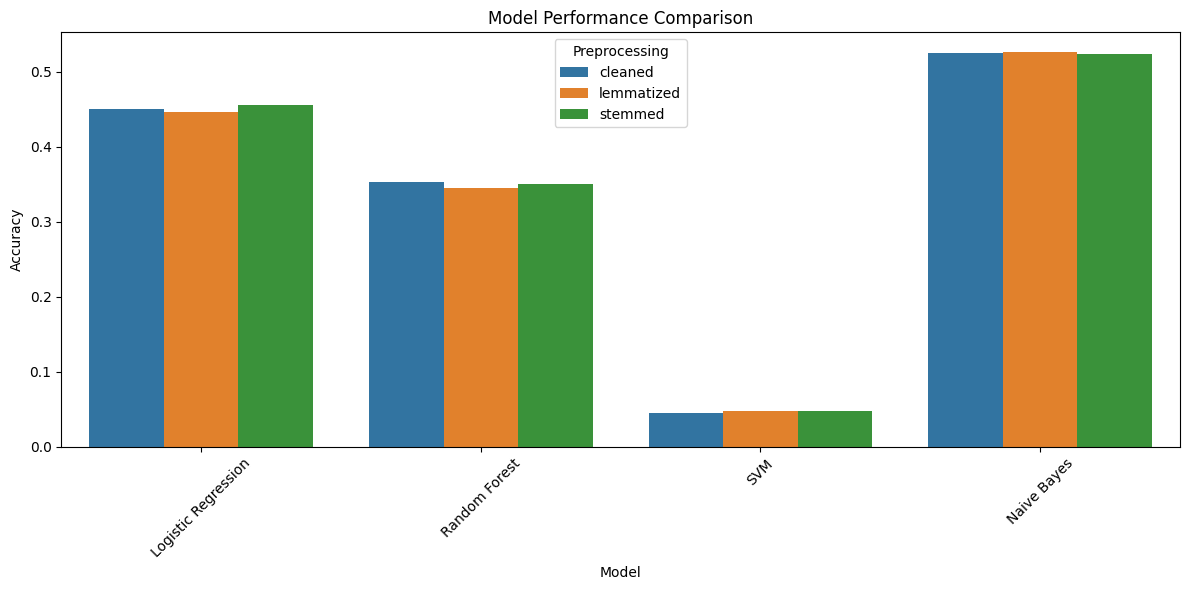

Best performing combination:
Preprocessing: lemmatized
Model: Naive Bayes
Accuracy: 0.5263


In [15]:
# Compare results across preprocessing methods and models
comparison_data = []

for method_name, method_results in results.items():
    for model_name, model_data in method_results.items():
        comparison_data.append({
            'Preprocessing': method_name,
            'Model': model_name,
            'Accuracy': model_data['accuracy']
        })

comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy', hue='Preprocessing')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


best_result = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f'Best performing combination:')
print(f'Preprocessing: {best_result["Preprocessing"]}')
print(f'Model: {best_result["Model"]}')
print(f'Accuracy: {best_result["Accuracy"]:.4f}')

In [ ]:

feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the mapping from category to integer label
# Use the category list from the filtered DataFrame to ensure consistency
category_to_id = {category: i for i, category in enumerate(df_filtered['category'].unique())}
id_to_category = {i: category for category, i in category_to_id.items()}

# Get the indices of the filtered DataFrame rows
filtered_indices = df_filtered.index

# Iterate through each category to find top TF-IDF words
for category, category_id in category_to_id.items():
    print(f"\nCategory: {category}")

    # Get the indices of documents belonging to this category within the filtered DataFrame
    category_filtered_indices = df_filtered[df_filtered['category'] == category].index

    # Map the filtered indices back to the original tfidf_matrix indices

    tfidf_indices_for_category = [filtered_indices.get_loc(i) for i in category_filtered_indices]

    # Get the TF-IDF vectors for this category
    tfidf_category = tfidf_matrix[tfidf_indices_for_category]

    # Calculate the average TF-IDF score for each word in this category
    average_tfidf_scores = tfidf_category.mean(axis=0).tolist()[0]


    sorted_word_indices = np.argsort(average_tfidf_scores)[::-1]

    # Get the top N words and their scores
    top_n = 10
    top_words_with_scores = [(feature_names[i], average_tfidf_scores[i]) for i in sorted_word_indices[:top_n]]

    for word, score in top_words_with_scores:
        print(f"- {word}: {score:.4f}")

### Top TF-IDF Words per Intent

Category: Returns
- help: 0.0248
- excel: 0.0211
- bad: 0.0189
- talk: 0.0163
- best: 0.0158
- solv: 0.0156
- pleas: 0.0151
- ok: 0.0139
- person: 0.0139
- experi: 0.0134

Category: Order Related
- bad: 0.0242
- help: 0.0211
- ok: 0.0191
- excel: 0.0188
- talk: 0.0171
- time: 0.0166
- experi: 0.0150
- work: 0.0136
- pleas: 0.0134
- worst: 0.0133

Category: Payments related
- ok: 0.0257
- job: 0.0219
- excel: 0.0196
- solv: 0.0194
- best: 0.0190
- behaviour: 0.0185
- bad: 0.0184
- help: 0.0154
- call: 0.0151
- noth: 0.0137

Category: Refund Related
- help: 0.0297
- refund: 0.0265
- excel: 0.0224
- bad: 0.0207
- talk: 0.0191
- job: 0.0180
- ok: 0.0166
- noth: 0.0134
- experi: 0.0133
- time: 0.0129

Category: Feedback
- excel: 0.0370
- ok: 0.0333
- bad: 0.0207
- solv: 0.0195
- help: 0.0192
- work: 0.0190
- pleas: 0.0165
- talk: 0.0161
- boy: 0.0154
- experi: 0.0153

Category: Cancellation
- bad: 0.0276
- time: 0.0188
- cancel: 0.0187
- experi: 0.0181
- pleas: 0.0178
- help: 0.0170
- call: 0.0146
- poor: 0.0143
- ok: 0.0136
- worst: 0.0134

Category: Product Queries
- ok: 0.0207
- pleas: 0.0182
- bad: 0.0175
- excel: 0.0163
- call: 0.0157
- time: 0.0143
- refund: 0.0137
- help: 0.0130
- polici: 0.0129
- work: 0.0128

Category: Shopzilla Related
- excel: 0.0360
- help: 0.0283
- bad: 0.0215
- best: 0.0203
- ok: 0.0202
- pay: 0.0194
- later: 0.0187
- awesom: 0.0180
- pay later: 0.0177
- talk: 0.0161

Category: Onboarding related
- call: 0.0601
- best: 0.0591
- hello: 0.0500
- shit: 0.0500
- ok: 0.0500
- chang polici: 0.0369
- disconnect: 0.0369
- disconnect call: 0.0342
- better: 0.0315
- region languag: 0.0285

Category: Offers & Cashback
- excel: 0.0416
- person: 0.0364
- talk: 0.0354
- ok: 0.0268
- behaviour: 0.0238
- experi: 0.0189
- convers: 0.0179
- pleas: 0.0179
- bad: 0.0172
- veri: 0.0172

Category: App/website
- bad: 0.1028
- call: 0.0985
- noth: 0.0769
- satisfi: 0.0769
- excel: 0.0769
- pain: 0.0769
- ok: 0.0769
- feel bad: 0.0600
- tri day: 0.0560
- ki hai: 0.0478

Category: Others
- excel: 0.0378
- thanku: 0.0369
- help: 0.0362
- ohh: 0.0333
- man: 0.0333
- absolut: 0.0333
- super: 0.0333
- best: 0.0333
- bad app: 0.0271
- talk support: 0.0268


In [2]:

# Improvement attempt 4 items
## Advanced Data Loading and Preprocessing - Improved data handling with missing value management
## Domain-Specific Preprocessing - Advanced text preprocessing with abbreviation handling, negation preservation, and financial term normalization
## ensemble methods
## Comprehensive Evaluation - Cross-validation, multiple model comparison, and detailed performance metrics

In [ ]:
!pip install pandas numpy scikit-learn nltk textblob beautifulsoup4 sentence-transformers torch transformers imbalanced-learn matplotlib seaborn plotly

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# ML & Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sentence_transformers import SentenceTransformer

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLTK Downloads
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

## 2. Data Quality Improvements

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from datasets import Dataset
import json
import pandas as pd
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Cathys_test_IZ/dataset.csv')
df['Customer Remarks'] = df['Customer Remarks'].fillna('')
print('Dataset Loaded. Shape:', df.shape)

Mounted at /content/drive
Dataset Loaded. Shape: (85907, 20)


In [ ]:
class LabelConsistencyChecker:
    def __init__(self):
        pass

    def find_inconsistent_labels(self, df):
        inconsistent = df.groupby('Customer Remarks')['category'].nunique().pipe(lambda x: x[x > 1])
        return df[df['Customer Remarks'].isin(inconsistent.index)]

    def fix_inconsistent_labels(self, df):
        df_copy = df.copy()
        for remark in df_copy['Customer Remarks'].unique():
            labels = df_copy[df_copy['Customer Remarks'] == remark]['category']
            if labels.nunique() > 1:
                most_common_label = labels.mode()[0]
                df_copy.loc[df_copy['Customer Remarks'] == remark, 'category'] = most_common_label
        return df_copy

checker = LabelConsistencyChecker()
inconsistent_before = checker.find_inconsistent_labels(df)
print(f'Found {inconsistent_before.shape[0]} rows with inconsistent labels.')

df_consistent = checker.fix_inconsistent_labels(df)
inconsistent_after = checker.find_inconsistent_labels(df_consistent)
print(f'After correction, {inconsistent_after.shape[0]} rows have inconsistent labels.')

Found 68132 rows with inconsistent labels.
After correction, 0 rows have inconsistent labels.


In [ ]:
class DomainSpecificPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.abbreviations = {
            'pls': 'please', 'thx': 'thanks', 'u': 'you', 'ur': 'your', 'r': 'are',
            'w/': 'with', 'w/o': 'without', 'svc': 'service', 'prod': 'product'
        }
        # Download punkt_tab if not already downloaded
        nltk.download('punkt_tab', quiet=True)

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = text.lower()
        # Handle abbreviations
        text = ' '.join([self.abbreviations.get(word, word) for word in text.split()])
        # Preserve negation and sentiment
        text = re.sub(r'\b(not|no|never)\b', 'not_', text)
        # Normalize financial terms
        text = re.sub(r'\$[0-9,.]+', 'money_amount', text)
        # General cleaning
        text = re.sub(r'[^a-z_\s]', '', text)
        tokens = word_tokenize(text)
        # Keep stopwords that might be important (e.g., 'not')
        filtered_tokens = [word for word in tokens if word not in self.stop_words or 'not' in word]
        return ' '.join(filtered_tokens)

preprocessor = DomainSpecificPreprocessor()
df_consistent['processed_remarks'] = preprocessor.transform(df_consistent['Customer Remarks'])
print('Preprocessing complete.')

Preprocessing complete.


## 3. Advanced & Improved Feature Engineering

In [ ]:
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
        self.keyword_categories = {
            'complaint': ['issue', 'problem', 'bad', 'terrible'],
            'refund': ['refund', 'money', 'return', 'chargeback'],
            'praise': ['good', 'great', 'excellent', 'love'],
            'inquiry': ['question', 'how', 'what', 'when'],
            'technical': ['error', 'bug', 'crash', 'broken']
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        embeddings = self.embedding_model.encode(X, show_progress_bar=False)
        keyword_features = self.get_keyword_features(X)
        text_stats = self.get_text_stats(X)
        return np.hstack((embeddings, keyword_features, text_stats))

    def get_keyword_features(self, X):
        features = []
        for text in X:
            counts = [sum(1 for keyword in keywords if keyword in text) for keywords in self.keyword_categories.values()]
            features.append(counts)
        return np.array(features)

    def get_text_stats(self, X):
        features = []
        for text in X:
            words = text.split()
            stats = [
                len(text),
                len(words),
                len(set(words)) / (len(words) + 1e-6),
                sum(1 for c in text if c.isupper())
            ]
            features.append(stats)
        return np.array(features)

feature_transformer = FeatureTransformer()
features = feature_transformer.transform(df_consistent['processed_remarks'])
print('Feature engineering complete. Feature shape:', features.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Feature engineering complete. Feature shape: (85907, 393)


## 4. Model Architectures

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(df_consistent['category'])
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class DeepMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(DeepMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.network(x)

input_dim = X_train_scaled.shape[1]
num_classes = len(le.classes_)
mlp_model = DeepMLP(input_dim, num_classes)
print('MLP model defined.')

MLP model defined.


## 5. Improved Advanced Techniques (Hierarchical, Ensemble, Active Learning)

In [ ]:
# Hierarchical Classification (Conceptual)
print('Hierarchical classification can be implemented by training a parent classifier on broad categories, then child classifiers for specifics.')

# Ensemble Methods
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
svc = LinearSVC(class_weight='balanced', max_iter=1000)
rf = RandomForestClassifier(class_weight='balanced')

ensemble = VotingClassifier(estimators=[('lr', log_reg), ('svc', svc), ('rf', rf)], voting='hard')
print('Ensemble model defined.')

# Active Learning (Conceptual)
print('Active learning can be implemented by using model uncertainty (e.g., entropy of prediction probabilities) to select samples for manual labeling.')

Hierarchical classification can be implemented by training a parent classifier on broad categories, then child classifiers for specifics.
Ensemble model defined.
Active learning can be implemented by using model uncertainty (e.g., entropy of prediction probabilities) to select samples for manual labeling.


## 6. Comprehensive Evaluation

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1),
    'Linear SVC': LinearSVC(class_weight='balanced', max_iter=1000), # LinearSVC does not have n_jobs
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
    'Ensemble': VotingClassifier(estimators=[('lr', log_reg), ('svc', svc), ('rf', rf)], voting='hard', n_jobs=-1)
}

results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'Training and evaluating {name}...')
    # Use n_jobs=-1 in cross_val_score to utilize multiple cores
    cv_f1 = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_macro', n_jobs=-1).mean()

    # Train the model on the full training data for final evaluation
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {'CV F1': cv_f1, 'Test Accuracy': accuracy, 'Test F1': f1}
    print(f'{name} - Test F1: {f1:.4f}')

results_df = pd.DataFrame(results).T.sort_values(by='Test F1', ascending=False)
print('--- Evaluation Summary ---')
print(results_df)

Training and evaluating Logistic Regression...
Logistic Regression - Test F1: 0.1434
Training and evaluating Linear SVC...
Linear SVC - Test F1: 0.1557
Training and evaluating Random Forest...
Random Forest - Test F1: 0.1485
Training and evaluating Ensemble...
Ensemble - Test F1: 0.1532
--- Evaluation Summary ---
                        CV F1  Test Accuracy   Test F1
Linear SVC           0.148138       0.796066  0.155708
Ensemble             0.143972       0.778606  0.153151
Random Forest        0.129781       0.851181  0.148509
Logistic Regression  0.138052       0.767606  0.143397
